# Experiments with sliding window
This notebook contains the finalized methods used for figures denoting comparisons

## library imports

In [1]:
import pandas as pd
from numpy import array,dot
from MDAnalysis.analysis import align
from functions.Sliding_Functions import local_rmsd_plotter,get_significance
from functions.CIF_Functions import make_df_atomlist
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

## Sliding window on PTM vs NOPTM

Text(0.5, 128.72222222222223, '7stz B_Factor')

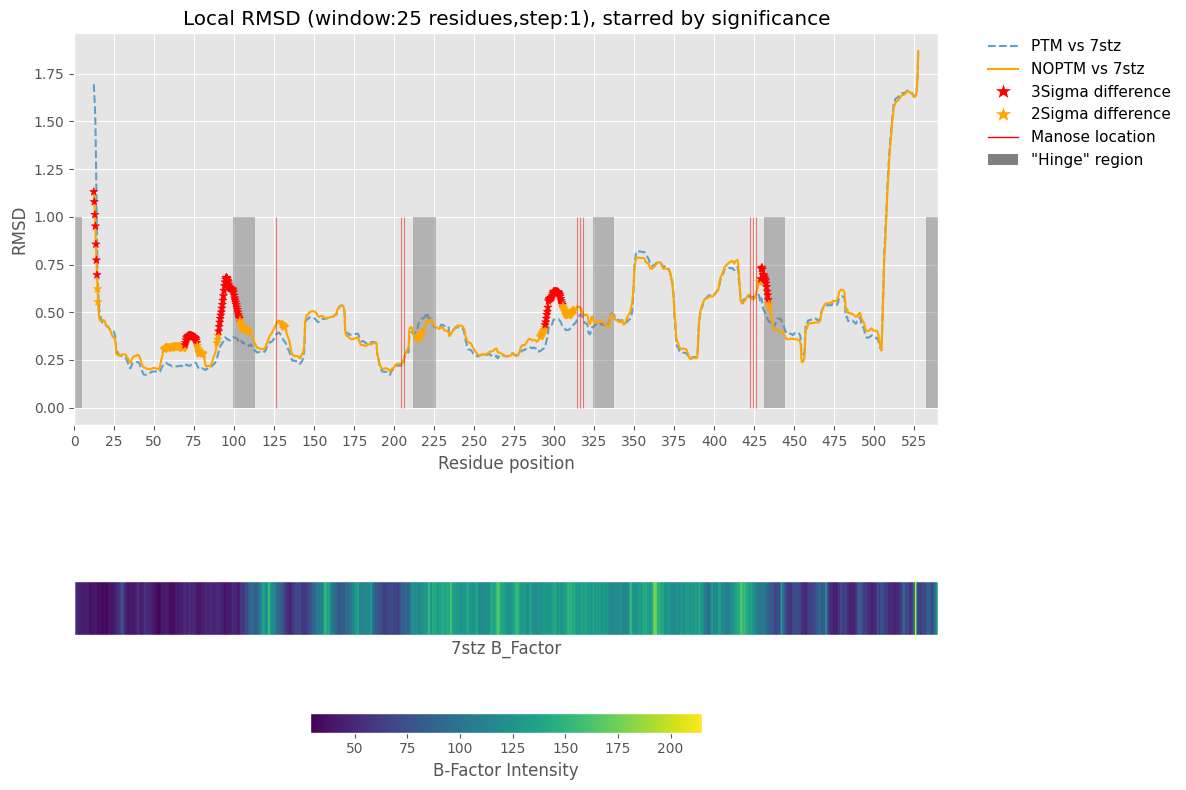

In [3]:
# Define which atoms to use
atomlist = ["CA","N","C"]
#atomlist = ["CA"]

# Read CIF and turn into df
## PTMS
ptm_df = make_df_atomlist("cif_files/Predictions/SEEDMATCHED/fold_adnan_seed42_ptms/fold_adnan_seed42_ptms_model_3.cif",atomlist)
## NO PTMS
noptm_df = make_df_atomlist("cif_files/Predictions/SEEDMATCHED/fold_adnan_seed1_noptms/fold_adnan_seed1_noptms_model_1.cif",atomlist)

## CRYSTAL
crystal_df = make_df_atomlist("cif_files/Crystals/7stz (1).cif",atomlist)

# Compare to the crystal
win = 25*len(atomlist)
x1,y1,pLDDTs1 = local_rmsd_plotter(ptm_df,crystal_df,stepsize=1,win_size=win)
x2,y2,pLDDTs2 = local_rmsd_plotter(noptm_df,crystal_df,stepsize=1,win_size=win)

plt.style.use('ggplot')

fig, (ax,ax2) = plt.subplots(nrows=2, sharex=False,figsize=(12,8))

ax.plot(array(x1)/len(atomlist),y1,zorder=1,color='#60a0c6',linestyle="dashed")
ax.plot(array(x2)/len(atomlist),y2,zorder=2,color='orange')
#ax.scatter(array(x1)/len(atomlist),y1,color=get_significance(x1,y1,y2),marker="*",alpha=[0 if i> sig3 or i< -sig3 else 0 if i> sig2 or i< -sig2 else 0 for i in data],zorder=3)
ax.scatter(array(x1)/len(atomlist),y2,color=get_significance(x1,y1,y2),marker="*",alpha=[1 if i== "red" else 1 if i== "orange" else 0 for i in get_significance(x1,y1,y2)],zorder=4)

ax.vlines(array([126, 204,206, 314, 316, 318,422,424,426]),0,1,alpha=.5,colors="red",label="Manose binding residues",linewidth=.8)

for i,j in [(0,5),(99,14),(212,14),(324,13),(431,13),(532,8)]:
    ax.add_patch(Rectangle((i,0),j,1,linewidth=1,edgecolor='none',facecolor='grey',alpha=.5))


legend_elements = [Line2D([0], [0], color='#60a0c6', label='PTM vs 7stz', markersize=15,linestyle="dashed"),
                   Line2D([0], [0], color='orange', label='NOPTM vs 7stz', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='3Sigma difference',markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='2Sigma difference',markerfacecolor='orange', markersize=15),
                   Line2D([0], [0], color='red', lw=1, label='Manose location'),
                   Patch(facecolor='grey', edgecolor='none',
                         label='"Hinge" region')]


ax.legend(handles=legend_elements,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.,prop={'size': 11},frameon=False)
#plt.legend(handles=legend_elements,frameon=False,,)
#ax.set_suptitle("local RMSD, over B_factors")
ax.set_title("Local RMSD (window:25 residues,step:1), starred by significance")
ax.set_ylabel("RMSD")
ax.set_xlabel("Residue position")
ax.set_xlim(0,540)
ax.set_xticks(np.arange(0,540,25))
#x.vlines(array([85,95,115]),0,1,alpha=.5,colors="green",label="AOI",linewidth=.8)

#res_Bfac = [list(crystal_df["B_iso_or_equiv"].astype(float))[i] for i in range(1620) if i%3==0]
res_Bfac = crystal_df["B_iso_or_equiv"].astype(float)

# Add a colorbar
cax = ax2.imshow([res_Bfac], cmap="viridis", aspect="100")
cbar = fig.colorbar(cax, ax=ax2, orientation='horizontal', fraction=0.05, pad=0.2)
cbar.set_label("B-Factor Intensity")  # Set label for colorbar

fig.tight_layout()
ax2.set_yticks([])
ax2.set_xticks([])
ax2.set_xlabel("7stz B_Factor")

B_factor - deltaRMSD correlation test

Text(37.722222222222214, 0.5, 'RMSD difference')

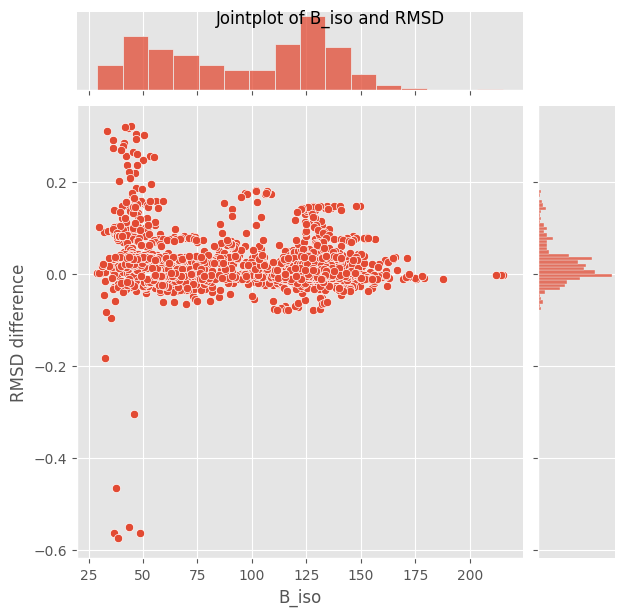

In [9]:
B_iso = list(crystal_df["B_iso_or_equiv"].astype(float))[37:-37]
#plt.suptitle("Delta rmsd (ptm-noptm) vs B_iso_or equiv")
#plt.title(f"pearsonr = {pearsonr(B_iso,data).statistic}")
#plt.scatter(x=data,y=B_iso,marker=".")
sns.jointplot(x= B_iso,y= data)
plt.suptitle("Jointplot of B_iso and RMSD")
plt.xlabel("B_iso")
plt.ylabel("RMSD difference")

## 2o72 Orthogonal control experiment

In [17]:
# Importing of models
PATH0 = "cif_files/Predictions/SEEDMATCHED/fold_adnan_seed1_noptms/fold_adnan_seed1_noptms_model_1.cif"
PATH1 = "cif_files/Predictions/SEEDMATCHED/fold_adnan_seed42_ptms/fold_adnan_seed42_ptms_model_3.cif"
PATH2 = "cif_files/Crystals/2o72.cif"

# Selecting which backbone atoms to use
atomlist = ["CA","N","C"]

# Reading in the models as dataframes
noptm_df = make_df_atomlist(PATH0,atomlist)
ptm_df = make_df_atomlist(PATH1,atomlist)
crystal_df = make_df_atomlist(PATH2,atomlist)

# Aligning sequences of models and cutting predictions to same length
print(list(noptm_df["label_comp_id"])[:213*len(atomlist)])
print(list(ptm_df["label_comp_id"])[:213*len(atomlist)])
print(list(crystal_df["label_comp_id"]))
ptm_df = ptm_df[:213*len(atomlist)]
noptm_df = noptm_df[:213*len(atomlist)]
crystal_df = crystal_df[:213*len(atomlist)]


['ASP', 'ASP', 'ASP', 'TRP', 'TRP', 'TRP', 'VAL', 'VAL', 'VAL', 'ILE', 'ILE', 'ILE', 'PRO', 'PRO', 'PRO', 'PRO', 'PRO', 'PRO', 'ILE', 'ILE', 'ILE', 'SER', 'SER', 'SER', 'CYS', 'CYS', 'CYS', 'PRO', 'PRO', 'PRO', 'GLU', 'GLU', 'GLU', 'ASN', 'ASN', 'ASN', 'GLU', 'GLU', 'GLU', 'LYS', 'LYS', 'LYS', 'GLY', 'GLY', 'GLY', 'PRO', 'PRO', 'PRO', 'PHE', 'PHE', 'PHE', 'PRO', 'PRO', 'PRO', 'LYS', 'LYS', 'LYS', 'ASN', 'ASN', 'ASN', 'LEU', 'LEU', 'LEU', 'VAL', 'VAL', 'VAL', 'GLN', 'GLN', 'GLN', 'ILE', 'ILE', 'ILE', 'LYS', 'LYS', 'LYS', 'SER', 'SER', 'SER', 'ASN', 'ASN', 'ASN', 'LYS', 'LYS', 'LYS', 'ASP', 'ASP', 'ASP', 'LYS', 'LYS', 'LYS', 'GLU', 'GLU', 'GLU', 'GLY', 'GLY', 'GLY', 'LYS', 'LYS', 'LYS', 'VAL', 'VAL', 'VAL', 'PHE', 'PHE', 'PHE', 'TYR', 'TYR', 'TYR', 'SER', 'SER', 'SER', 'ILE', 'ILE', 'ILE', 'THR', 'THR', 'THR', 'GLY', 'GLY', 'GLY', 'GLN', 'GLN', 'GLN', 'GLY', 'GLY', 'GLY', 'ALA', 'ALA', 'ALA', 'ASP', 'ASP', 'ASP', 'THR', 'THR', 'THR', 'PRO', 'PRO', 'PRO', 'PRO', 'PRO', 'PRO', 'VAL', 'VAL'

crystal v ptm: 1.2338298882054188
crystal v noptm: 0.77621988841998
noptm_A v noptm_B RMSD: 0.6918927926099309


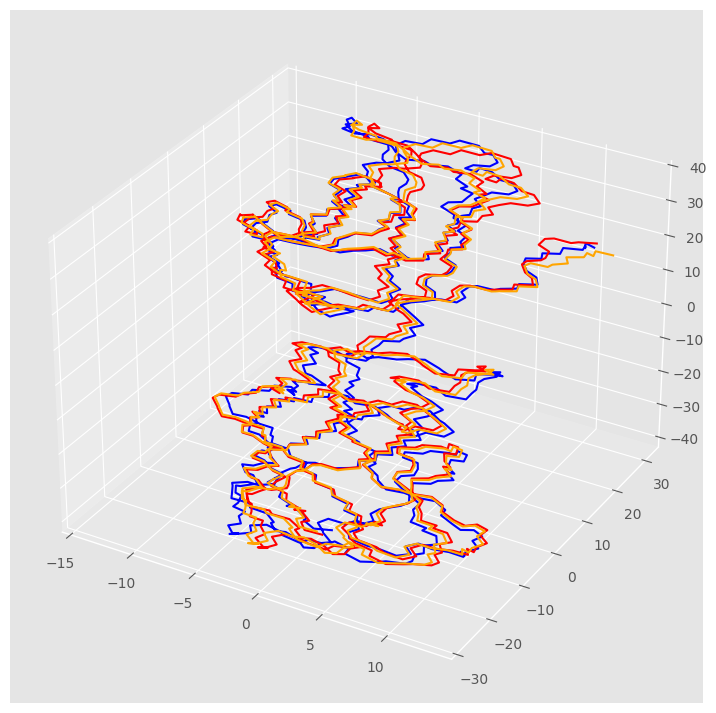

In [20]:
df_a,df_b = crystal_df, ptm_df
df_c =  noptm_df
### Aligning

# Mean Centering
x= array(df_a[df_a.columns[10:13]]).astype(float)
x_mean_centered = x - (sum(x)/len(x))

y= array(df_b[df_b.columns[10:13]]).astype(float)
y_mean_centered = y - (sum(y)/len(y))

y2= array(df_c[df_c.columns[10:13]]).astype(float)
y2_mean_centered = y2 - (sum(y2)/len(y2))

R, rms = align.rotation_matrix(x_mean_centered, y_mean_centered)
y_aligned = dot(y_mean_centered,R)
print("crystal v ptm:",rms)

R, rms = align.rotation_matrix(x_mean_centered, y2_mean_centered)
y2_aligned = dot(y2_mean_centered,R)
print("crystal v noptm:",rms)

R, rms = align.rotation_matrix(y_mean_centered, y2_mean_centered)
print("noptm_A v noptm_B RMSD:",rms)

# init plot
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection='3d')
# x 
x,y,z = x_mean_centered[:,0],x_mean_centered[:,1],x_mean_centered[:,2]
ax.plot3D(x, y, z,color="blue")
# y
x,y,z = y_aligned[:,0],y_aligned[:,1],y_aligned[:,2]
ax.plot3D(x, y, z,color="red")
# y2
x,y,z = y2_aligned[:,0],y2_aligned[:,1],y2_aligned[:,2]
ax.plot3D(x, y, z,color="orange")
plt.show()

### Visualizing full method 

Text(0.5, 128.72222222222223, '2o72 B_Factor')

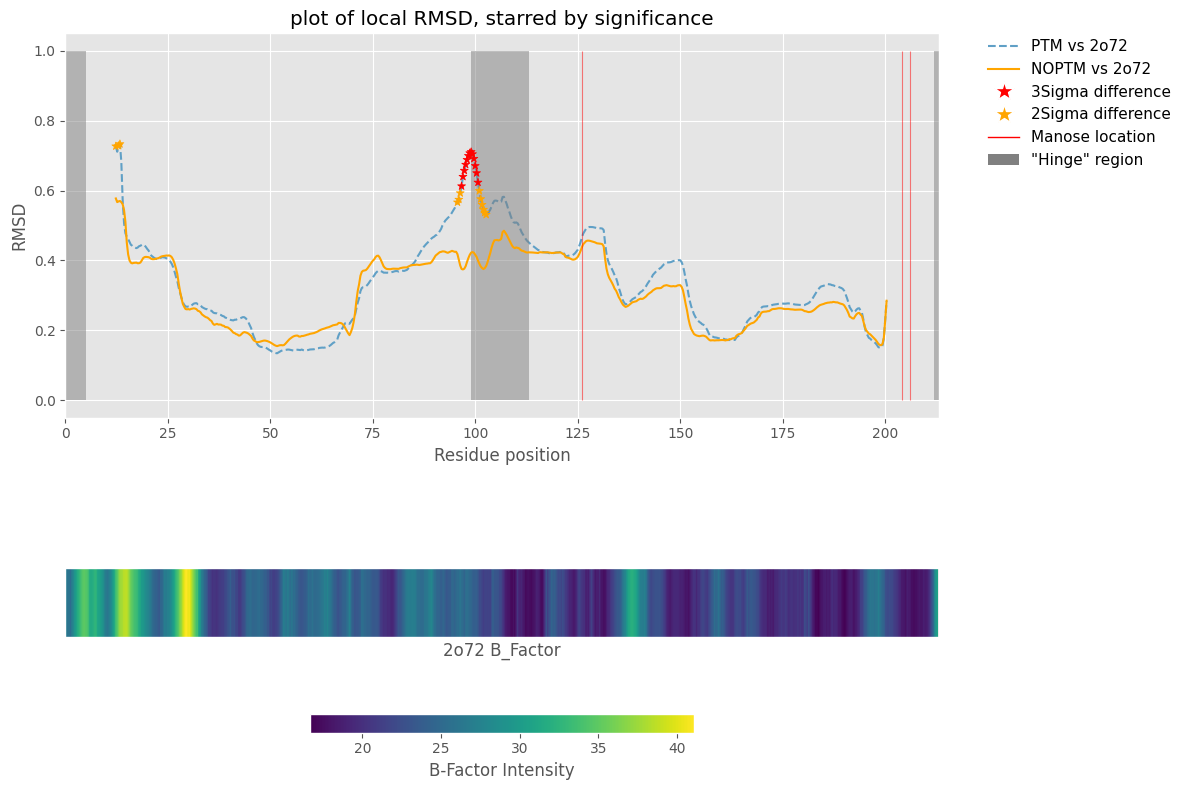

In [5]:
# Define which atoms to use
atomlist = ["CA","N","C"]
#atomlist = ["CA"]

# Read CIF and turn into df
## PTMS
ptm_df = make_df_atomlist("cif_files/Predictions/SEEDMATCHED/fold_adnan_seed42_ptms/fold_adnan_seed42_ptms_model_3.cif",atomlist)[:213*3]
## NOPTMS
noptm_df = make_df_atomlist("cif_files/Predictions/SEEDMATCHED/fold_adnan_seed1_noptms/fold_adnan_seed1_noptms_model_1.cif",atomlist)[:213*3]

## CRYSTAL
crystal_df = make_df_atomlist("cif_files/Crystals/2o72.cif",atomlist)[:213*3]

# Compare to the crystal
win = 25*len(atomlist)
x1,y1,pLDDTs1 = local_rmsd_plotter(ptm_df,crystal_df,stepsize=1,win_size=win)
x2,y2,pLDDTs2 = local_rmsd_plotter(noptm_df,crystal_df,stepsize=1,win_size=win)

plt.style.use(style="ggplot")

fig, (ax3,ax4) = plt.subplots(nrows=2, sharex=False,figsize=(12,8))

ax3.plot(array(x1)/len(atomlist),y1,zorder=1,color="#60a0c6",linestyle="dashed",label="PTM prediction")
ax3.plot(array(x2)/len(atomlist),y2,zorder=2,color="orange",label="noPTM prediction")
ax3.scatter(array(x1)/len(atomlist),y1,color=get_significance(x1,y1,y2),marker="*",alpha=[1 if i== "red" else 1 if i== "orange" else 0 for i in get_significance(x1,y1,y2)],zorder=3)
#ax3.scatter(array(x1)/len(atomlist),y2,color=["red" if i> sig3 or i< -sig3 else "orange" if i> sig2 or i< -sig2 else "g" for i in data],marker="*",alpha=[0 if i> sig3 or i< -sig3 else 0 if i> sig2 or i< -sig2 else 0 for i in data],zorder=4)

ax3.vlines(array([126, 204,206]),0,1,alpha=.5,colors="red",label="Manose binding residues",linewidth=.8)

for i,j in [(0,5),(99,14),(212,14)]:
    ax3.add_patch(Rectangle((i,0),j,1,linewidth=1,edgecolor='none',facecolor='grey',alpha=.5))


legend_elements = [Line2D([0], [0], color='#60a0c6', label='PTM vs 2o72', markersize=15,linestyle="dashed"),
                   Line2D([0], [0], color='orange', label='NOPTM vs 2o72', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='3Sigma difference',markerfacecolor='red', markersize=15),
                   Line2D([0], [0], marker='*', color='w', label='2Sigma difference',markerfacecolor='orange', markersize=15),
                   Line2D([0], [0], color='red', lw=1, label='Manose location'),
                   Patch(facecolor='grey', edgecolor='none',
                         label='"Hinge" region')]


ax3.legend(handles=legend_elements,bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.,prop={'size': 11},frameon=False)
#plt.legend(handles=legend_elements,frameon=False,)
#ax.set_suptitle("local RMSD, over B_factors")

ax3.set_title("plot of local RMSD, starred by significance")
ax3.set_ylabel("RMSD")
ax3.set_xticks(np.arange(0,250,25))
ax3.set_xlabel("Residue position")
ax3.set_xlim(0,213)
#ax3.set_xlim(155,540+155)

#x.vlines(array([85,95,115]),0,1,alpha=.5,colors="green",label="AOI",linewidth=.8)

#res_Bfac = [list(crystal_df["B_iso_or_equiv"].astype(float))[i] for i in range(1620) if i%3==0]
res_Bfac = crystal_df["B_iso_or_equiv"].astype(float)
#res_Bfac = [i for i in res_Bfac if i%3 ==0] 
#ax4.imshow([res_Bfac],cmap="gnuplot",aspect="100")
#fig.tight_layout()
#ax4.set_yticks([])
#ax4.set_xticks([])
#ax4.set_xlabel("7stz B_Factor")
#print(len(res_Bfac))

cax = ax4.imshow([res_Bfac], cmap="viridis", aspect="50")

# Add a colorbar
cbar = fig.colorbar(cax, ax=ax4, orientation='horizontal', fraction=0.05, pad=0.2)
cbar.set_label("B-Factor Intensity")  # Set label for colorbar

fig.tight_layout()
ax4.set_xlim(0,213*3)
ax4.set_yticks([])
ax4.set_xticks([])
ax4.set_xlabel("2o72 B_Factor")

## All predictions compared 

In [7]:
# Define which atoms to use
atomlist = ["CA","N","C"]
# Read CIF and turn into df
## PTMS
ptm_crystal_df = make_df_atomlist("cif_files/Crystals/7stz (1).cif",atomlist)[:213*len(atomlist)]
ptm_df          = make_df_atomlist("cif_files/Predictions/SEEDMATCHED/fold_adnan_seed42_ptms/fold_adnan_seed42_ptms_model_3.cif",atomlist)[:213*len(atomlist)]
ptm_minus126_df = make_df_atomlist("cif_files/Predictions/REM_MANNOSE/fold_seed42_ptms_minus126/fold_seed42_ptms_minus126_model_4.cif",atomlist)[:213*len(atomlist)]
ptm_minus20x_df = make_df_atomlist("cif_files/Predictions/REM_MANNOSE/fold_seed42_ptms_minus20x/fold_seed42_ptms_minus20x_model_4.cif",atomlist)[:213*len(atomlist)]
## NO PTMS
noptm_df = make_df_atomlist("cif_files/Predictions/SEEDMATCHED/fold_adnan_seed1_noptms/fold_adnan_seed1_noptms_model_1.cif",atomlist)[:213*len(atomlist)]
noptm_crystal_df = make_df_atomlist("cif_files/Crystals/2o72.cif",atomlist)[:213*len(atomlist)]


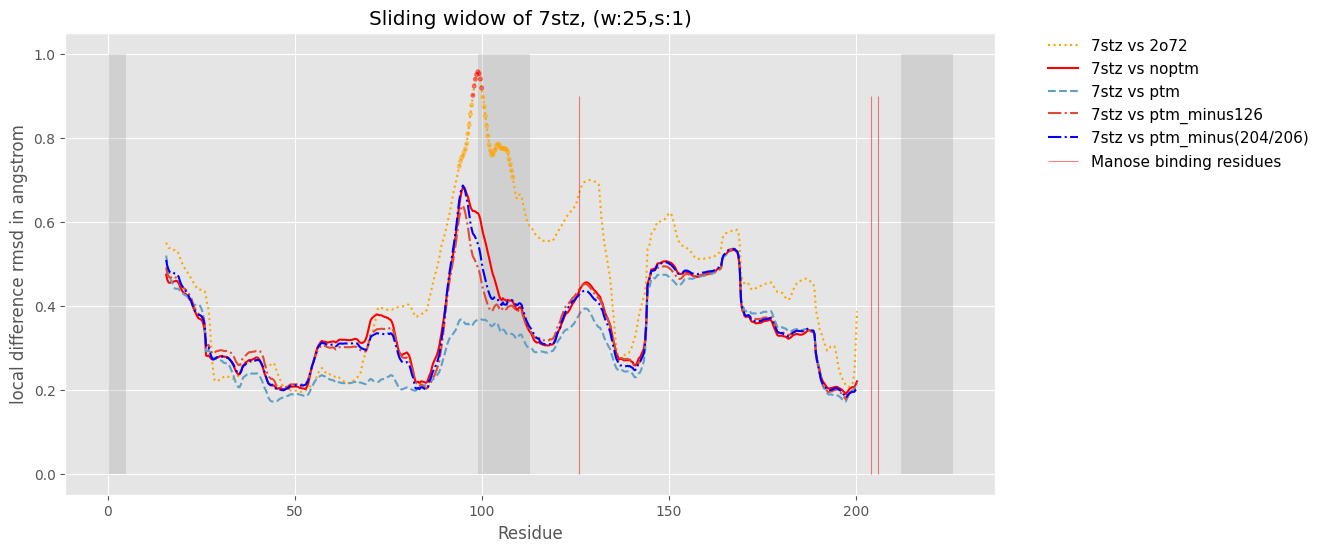

In [8]:
plt.figure(figsize=(12,6))
plt.style.use("ggplot")


x,y1,plldts = local_rmsd_plotter(ptm_crystal_df,noptm_crystal_df,1,75)
plt.plot((array(x)/3)[10:],y1[10:],label = "7stz vs 2o72",color = "orange",linestyle="dotted")
x,y,plldts = local_rmsd_plotter(ptm_crystal_df,noptm_df,1,75)
plt.plot((array(x)/3)[10:],y[10:],label="7stz vs noptm",color='red')
x,y2,plldts = local_rmsd_plotter(ptm_crystal_df,ptm_df,1,75)
plt.plot((array(x)/3)[10:],y2[10:],label="7stz vs ptm",linestyle="--",color='#60a0c6')
x,y3,plldts = local_rmsd_plotter(ptm_crystal_df,ptm_minus126_df,1,75)
plt.plot((array(x)/3)[10:],y3[10:],label="7stz vs ptm_minus126",linestyle="dashdot")
x,y4,plldts = local_rmsd_plotter(ptm_crystal_df,ptm_minus20x_df,1,75)
plt.plot((array(x)/3)[10:],y4[10:],label="7stz vs ptm_minus(204/206)",color="blue",linestyle='dashdot')

color = get_significance(x,y1,y2)
plt.scatter((array(x)/3)[10:],y1[10:],color=color[10:],marker=".",alpha=[0.0 if i == "b" else .5 for i in color][10:],zorder=3)
color = get_significance(x,y,y2)
#plt.scatter((array(x)/3)[10:],y[10:],color=color[10:],marker=".",alpha=[0.0 if i == "b" else 0.5 for i in color][10:],zorder=3)
color = get_significance(x,y3,y2)
#plt.scatter((array(x)/3)[10:],y3[10:],color=color[10:],marker=".",alpha=[0.0 if i == "b" else .5 for i in color][10:],zorder=3)
color = get_significance(x,y4,y2)
#plt.scatter((array(x)/3)[10:],y4[10:],color=color[10:],marker=".",alpha=[0.0 if i == "b" else 0.5 for i in color][10:],zorder=3)

plt.vlines(array([126, 204,206,]),0,.9,alpha=.5,colors="red",label="Manose binding residues",linewidth=.8)

for i,j in [(0,5),(99,14),(212,14)]:
    plt.gca().add_patch(Rectangle((i,0),j,1,linewidth=1,edgecolor='none',facecolor='grey',alpha=.2))
plt.title("Sliding widow of 7stz, (w:25,s:1)")
plt.xlabel("Residue")
plt.ylabel("local difference rmsd in angstrom")
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left', borderaxespad=0.,prop={'size': 11},frameon=False)